# Mandate-4 Contribution

Group Members: Chandrahas Sai(IMT2019019) Kopparapu SaiKrishna(IMT201945)

## Likert-Scale Rating

CO1: \*\*      
CO2: \*\*\*      
CO3: \*\*\*      
CO4: \*\*\*\
CO5: \*\*\*\*\
CO6: \*\*\*\*

In this mandate contribution, we created inference models for encoder and decoder. These encoder and decoder models will be used for predictions. We also wrote a function for having conversation with chat-bot which you can see at the end. We have also explained about semantic and syntactic analysis concerned with our chat bot implementation showing appropriate examples in the form of screen shots in the end

## Functions to print few items present in lists and dictionaries

In [ ]:
def list_head(l):
    for i in range(5):
        print(l[i])
        print(" ")
    
    print("--------------------------------------------------------------------------------- ")
    print(" ")
        
def dict_head(d):
    dl = list(d.items())
    for i in range(5):
        print(dl[i])
        print(" ")
    
    print("--------------------------------------------------------------------------------- ")
    print(" ")


## Importing libraries

In [ ]:
import numpy as np
import tensorflow as tf
import re
import time
import pandas as pd
from tqdm import tqdm
import nltk
from nltk.corpus import stopwords

## Importing data sets.

In [ ]:
data = open('Dataset/movie_lines.txt', encoding = 'utf-8', errors = 'ignore').read().split('\n')
exchanges = open('Dataset/movie_conversations.txt', encoding = 'utf-8', errors = 'ignore').read().split('\n')


print(len(data))
print(len(exchanges))

304714
83098


In [ ]:
list_head(data)

L1045 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ They do not!
 
L1044 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ They do to!
 
L985 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ I hope so.
 
L984 +++$+++ u2 +++$+++ m0 +++$+++ CAMERON +++$+++ She okay?
 
L925 +++$+++ u0 +++$+++ m0 +++$+++ BIANCA +++$+++ Let's go.
 
--------------------------------------------------------------------------------- 
 


In [ ]:
list_head(exchanges)

u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L194', 'L195', 'L196', 'L197']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L198', 'L199']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L200', 'L201', 'L202', 'L203']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L204', 'L205', 'L206']
 
u0 +++$+++ u2 +++$+++ m0 +++$+++ ['L207', 'L208']
 
--------------------------------------------------------------------------------- 
 


## Extracting dictionary of format {line_id: line}

In [ ]:
dict_id_line={}

for line in data:
    buff = line.split(' +++$+++ ')
    if len(buff) == 5:
        dict_id_line[buff[0]] = buff[4]

dict_head(dict_id_line)


('L1045', 'They do not!')
 
('L1044', 'They do to!')
 
('L985', 'I hope so.')
 
('L984', 'She okay?')
 
('L925', "Let's go.")
 
--------------------------------------------------------------------------------- 
 


## Extracting exchanges lists containg line Ids of lines in the exhanges

In [ ]:
exchange_ids = []

for exchange in exchanges:
    buff_elements = exchange.split(' +++$+++ ')[-1][1:-1]
    ids = buff_elements.replace("'", "").replace(" ", "") # avoiding list within a list using [1:-1]
    
    exchange_ids.append(ids.split(','))


list_head(exchange_ids)

['L194', 'L195', 'L196', 'L197']
 
['L198', 'L199']
 
['L200', 'L201', 'L202', 'L203']
 
['L204', 'L205', 'L206']
 
['L207', 'L208']
 
--------------------------------------------------------------------------------- 
 


## Generating Q&A from  list of exchange_ids 

In [ ]:
all_questions = []
all_answers = []
for exchange in exchange_ids:
    l = len(exchange)-1
    i=0
    while(i<l):
        all_questions.append(dict_id_line[exchange[i]])
        all_answers.append(dict_id_line[exchange[i+1]])
        i+=1
list_head(all_questions)
print("")
print("")
list_head(all_answers)


Can we make this quick?  Roxanne Korrine and Andrew Barrett are having an incredibly horrendous public break- up on the quad.  Again.
 
Well, I thought we'd start with pronunciation, if that's okay with you.
 
Not the hacking and gagging and spitting part.  Please.
 
You're asking me out.  That's so cute. What's your name again?
 
No, no, it's my fault -- we didn't have a proper introduction ---
 
--------------------------------------------------------------------------------- 
 


Well, I thought we'd start with pronunciation, if that's okay with you.
 
Not the hacking and gagging and spitting part.  Please.
 
Okay... then how 'bout we try out some French cuisine.  Saturday?  Night?
 
Forget it.
 
Cameron.
 
--------------------------------------------------------------------------------- 
 


In [ ]:
len(all_answers)

221616

In [ ]:
questions = []
answers = []
for i in range(len(all_questions)):
    if len(all_questions[i]) < 15:
        questions.append(all_questions[i])
        answers.append(all_answers[i])

In [ ]:
len(questions)

39059

## Cleaning the text and handling case sensitivity in questions and answers

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"i'm", "i am", text)
    text = re.sub(r"he's", "he is", text)
    text = re.sub(r"she's", "she is", text)
    text = re.sub(r"that's", "that is", text)
    text = re.sub(r"what's", "what is", text)
    text = re.sub(r"where's", "where is", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    text = re.sub(r"\.", " . ", text)
    text = re.sub(r"\?", " ? ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"/", " / ", text)
    text = re.sub(r",", " , ", text)
    text = re.sub(r'"', ' " ', text)
    text = re.sub(r"-", " - ", text)
    
    

    text = re.sub(r"[-()\"#/@;:<>{}+=~|.?,]", "", text)
    text = re.sub(' +', ' ', text)
    return text


In [ ]:
clean_questions = []
for question in questions:
    clean_questions.append(clean_text(question))
    
clean_answers = []
for answer in answers:
    clean_answers.append(clean_text(answer))

list_head(clean_questions)
print(" ")
print(" ")
list_head(clean_answers)


cameron 
 
why 
 
there 
 
sure have 
 
she is not a 
 
--------------------------------------------------------------------------------- 
 
 
 
the thing is cameron i am at the mercy of a particularly hideous breed of loser my sister i cannot date until she does 
 
unsolved mystery she used to be really popular when she started high school then it was just like she got sick of it or something 
 
where 
 
i really really really wanna go but i cannot not unless my sister goes 
 
lesbian no i found a picture of jared leto in one of her drawers so i am pretty sure she is not harboring same sex tendencies 
 
--------------------------------------------------------------------------------- 
 


In [ ]:
print(len(clean_questions))
print(len(clean_answers))
list_head(clean_answers)

39059
39059
the thing is cameron i am at the mercy of a particularly hideous breed of loser my sister i cannot date until she does 
 
unsolved mystery she used to be really popular when she started high school then it was just like she got sick of it or something 
 
where 
 
i really really really wanna go but i cannot not unless my sister goes 
 
lesbian no i found a picture of jared leto in one of her drawers so i am pretty sure she is not harboring same sex tendencies 
 
--------------------------------------------------------------------------------- 
 


In [ ]:
for i in range(len(clean_answers)):
    clean_answers[i] = ' '.join(clean_answers[i].split()[:11])


In [ ]:
# clean_answers=clean_answers[:20000]
# clean_questions=clean_questions[:20000]


In [ ]:
len(clean_questions)

39059

## Calculating frequency of  each word

In [ ]:
word2count = {}
for q in tqdm(clean_questions):
    words = nltk.word_tokenize(q)
    for word in words :
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

for a in tqdm(clean_answers):
    words = nltk.word_tokenize(a)
    for word in words :
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

dict_head(word2count)
len(word2count)

100%|█████████████████████████████████████████████████████████████████████████| 39059/39059 [00:02<00:00, 14931.57it/s]

('cameron', 12)
 
('why', 1875)
 
('there', 1343)
 
('sure', 778)
 
('have', 2966)
 
--------------------------------------------------------------------------------- 
 


16900

In [ ]:
word_id = {}
word_num = 0
for word, count in word2count.items():
    if count>4:
        word_id[word] = word_num
        word_num += 1
len(word_id)

3729

## Generating an unique integer to each unique word (including tags).(Syntax processing)

word_id is a mapping from word to an id(unique integer)

In [ ]:
tokens = ['<PAD>', '<EOS>', '<NULL>', '<BOS>'] #,'<STOPWORD>']
tmp = len(word_id)
for token in tokens:
    word_id[token] = tmp
    tmp += 1

inv_word_id is a mapping from previously assigned id to a word both of these share same natural language space(semantic processing)

In [ ]:
inv_word_id = {w:v for v, w in word_id.items()}

## Adding BOS and EOS at the beginning and ending of the answers respectively.

In [ ]:
tagged_answers = ["<BOS> " + line + " <EOS>" for line in clean_answers]
list_head(tagged_answers)

<BOS> the thing is cameron i am at the mercy of a <EOS>
 
<BOS> unsolved mystery she used to be really popular when she started <EOS>
 
<BOS> where <EOS>
 
<BOS> i really really really wanna go but i cannot not unless <EOS>
 
<BOS> lesbian no i found a picture of jared leto in one <EOS>
 
--------------------------------------------------------------------------------- 
 


## Using above calculated unique integers to encode questions and answers 

In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chand\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
#stopwords_list = stopwords.words('english')
encoded_questions = []
for question in clean_questions:
    temp = []
    for word in question.split():
        if word not in word_id :
            temp.append(word_id['<NULL>'])
#         elif word in stopwords_list:
#             temp.append(word_id['<STOPWORD>'])
        else :
            temp.append(word_id[word])
    encoded_questions.append(temp)
    
encoded_answers = []
for answer in tagged_answers:
    temp = []
    for word in answer.split():
        if word not in word_id:
            temp.append(word_id['<NULL>'])
            
#         elif word in stopwords_list:
#             temp.append(word_id['<STOPWORD>'])
           
        else:
            temp.append(word_id[word])
    encoded_answers.append(temp)


In [ ]:
list_head(encoded_questions)

list_head(encoded_answers)

[3729]
 
[1]
 
[2]
 
[3, 4]
 
[5, 6, 7, 8]
 
--------------------------------------------------------------------------------- 
 
[3732, 89, 693, 6, 3729, 10, 59, 376, 89, 3731, 98, 8, 3730]
 
[3732, 3731, 1230, 5, 1382, 21, 307, 165, 2938, 100, 5, 1833, 3730]
 
[3732, 52, 3730]
 
[3732, 10, 165, 165, 165, 3731, 39, 14, 10, 3731, 7, 1783, 3730]
 
[3732, 3731, 13, 10, 833, 8, 1752, 98, 3731, 3731, 240, 225, 3730]
 
--------------------------------------------------------------------------------- 
 


## Syntactic Processing

tokens = ['PAD', 'EOS', 'NULL', 'BOS'] #,'STOPWORD>']

PAD - padded with 0

EOS - End of sentence

NULL - word not found

BOS - beginning of sentence


These tokens which we assigned earlier are useful for our model to know the context in which it is predicting the next word


For example if our model comes accross BOS i.e. beginning of sentence then it gets to know that it needs to predict a word that is either a noun or article(Since most sentences begin with them) for syntax to be satisfied, In this way Syntactic processing can be improved to some extent, Although Ultimately its upto the model for proper suntax processing


## Seq2Seq Model (Encoder-Decoder Architecture)

Seq2Seq models are used where there is a mapping necessary from a fixed length input to a fixed length output, but length of input and output may differ. This applies to chatbot applicaiton since user input is fixed and output from the chatbot is also fixed and also length of user input and length of chatbot output are not necessarily the same , so we can eastablish the mapping using seq2seq model(Regular LSTM network alone cant address our problem as it can only map each inputword to an output word i.e. input length equal to that of output)Hence we encoder-decoder arcgitecture under seq2seq model

## Creating encoder, decoder inputs

We should not send varying length encoder input and decoder input so we pad the length with zeroes(here we chose maximum length of 15)
Here we are first creating padded inputs for encoder and decoder inputs using the lists encoded_questions, encoded_answers generated in preprocessing step. 
Now, the decoder output is created by removing the first token(tags like 'BOS') of decoder input. this decoder output. Later we convert 2d data to 3d using to_categorical function on decoder_output(Since this is the format expected for LSTM output)
    
   

In [ ]:
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Embedding, LSTM, Input


In [ ]:
encoder_inp = pad_sequences(encoded_questions, 15,
                            dtype = 'int32',
                            padding='post',
                            truncating='post',
                            value=0.0)

decoder_inp = pad_sequences(encoded_answers, 15,
                            dtype = 'int32',
                            padding='post',
                            truncating='post',
                            value=0.0)


decoder_output = pad_sequences([i[1:] for i in decoder_inp], 15,
                               dtype = 'int32',
                               padding='post',
                               truncating='post',
                               value=0.0)

decoder_final_output = to_categorical(decoder_output, len(word_id), dtype='float32')



## Creating training model and fitting the model

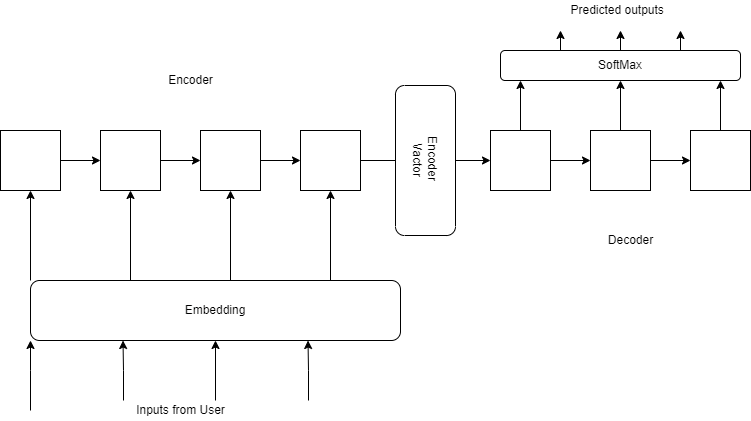

We will create an encoder LSTM and then then give it embeded input through embedding layer which reduces dimensionality of input. This encoder LSTM will return encoder states which are then passed as input to decoder LSTM along with decoder input. Decoder LSTM is given the initial state as the states output from the encoder_lstm. This decoder LSTM will give decoder output and using this decoder output, we will generate the probabilities. To generate these probabilities we are using softmax function in dense layer.

In [ ]:
placeholder_enc = Input(shape=(15, ))
placeholder_dec = Input(shape=(15, ))



embed = Embedding(input_dim= len(word_id)+1,                    #This reduces the dimensionality from input_dim to output_dim
                  output_dim=50, 
                  input_length=15,
                  trainable=True)


encoder_embed = embed(placeholder_enc)                                  

encoder_lstm = LSTM(units=400,                                   #encoder-LSTM layer
                activation='tanh',
                recurrent_activation='sigmoid',
                return_sequences=True, 
                return_state=True)

encoder_output, state1, state2 = encoder_lstm(encoder_embed)         #states of encoder


decoder_embed = embed(placeholder_dec)
decoder_lstm = LSTM(units=400,                                      
                    activation='tanh',
                    recurrent_activation='sigmoid',
                    return_sequences=True,
                    return_state=True)

decoder_output, e1, e2 = decoder_lstm(decoder_embed, initial_state=[state1, state2])  #states of encoder adre passed as initial states of decoder lstm

dense = Dense(units=len(word_id), activation='softmax', kernel_initializer="glorot_uniform")

dense_output = dense(decoder_output)                      # using dense layer to predict probabilities(softmax)
model = Model([placeholder_enc, placeholder_dec], dense_output)



model.compile(loss='categorical_crossentropy'
              ,metrics=['acc']
              ,optimizer='adam')


In [ ]:
model.fit([encoder_inp, decoder_inp], decoder_final_output,epochs=15)

Epoch 1/15
1221/1221 [==============================] - 116s 93ms/step - loss: 2.6824 - acc: 0.5606
Epoch 2/15
1221/1221 [==============================] - 106s 87ms/step - loss: 2.3722 - acc: 0.5895
Epoch 3/15
1221/1221 [==============================] - 106s 86ms/step - loss: 2.2720 - acc: 0.5970
Epoch 4/15
1221/1221 [==============================] - 107s 88ms/step - loss: 2.2093 - acc: 0.6011
Epoch 5/15
1221/1221 [==============================] - 107s 88ms/step - loss: 2.1577 - acc: 0.6042
Epoch 6/15
1221/1221 [==============================] - 109s 89ms/step - loss: 2.1124 - acc: 0.6069
Epoch 7/15
1221/1221 [==============================] - 109s 89ms/step - loss: 2.0683 - acc: 0.6091
Epoch 8/15
1221/1221 [==============================] - 109s 89ms/step - loss: 2.0278 - acc: 0.6109
Epoch 9/15
1221/1221 [==============================] - 113s 92ms/step - loss: 1.9926 - acc: 0.6129
Epoch 10/15
1221/1221 [==============================] - 110s 90ms/step - loss: 1.9562 - acc: 0.6143

In [ ]:
model.fit([encoder_inp, decoder_inp], decoder_final_output,epochs=35)

Epoch 1/35
1221/1221 [==============================] - 107s 87ms/step - loss: 1.7504 - acc: 0.6320
Epoch 2/35
1221/1221 [==============================] - 107s 88ms/step - loss: 1.7179 - acc: 0.6356
Epoch 3/35
1221/1221 [==============================] - 110s 90ms/step - loss: 1.6867 - acc: 0.6398
Epoch 4/35
1221/1221 [==============================] - 109s 90ms/step - loss: 1.6562 - acc: 0.6438
Epoch 5/35
1221/1221 [==============================] - 106s 87ms/step - loss: 1.6275 - acc: 0.6483
Epoch 6/35
1221/1221 [==============================] - 103s 84ms/step - loss: 1.5981 - acc: 0.6523
Epoch 7/35
1221/1221 [==============================] - 102s 84ms/step - loss: 1.5696 - acc: 0.6568
Epoch 8/35
1221/1221 [==============================] - 102s 83ms/step - loss: 1.5422 - acc: 0.6613
Epoch 9/35
1221/1221 [==============================] - 102s 84ms/step - loss: 1.5153 - acc: 0.6654
Epoch 10/35
1221/1221 [==============================] - 101s 83ms/step - loss: 1.4890 - acc: 0.6700

### We achieve accuracy of 0.77 after running of 50 epochs(35+15)

### Saving model that was fit

We use model.save from keras to save the already fit model on 50 epochs, Later we use keras.models.load models to retrieve the already fit model back

In [ ]:

model.save("my_model_a")
# reconstructed_model = keras.models.load_model("my_model")


INFO:tensorflow:Assets written to: my_model_a\assets


INFO:tensorflow:Assets written to: my_model_a\assets


In [ ]:
loaded_model = keras.models.load_model("my_model")


## Semantic Processing

1. We collected the Conversation data from the dataset and parsed it in proper way(into questions and answers). And trained model on questions and answers(encoder and decoder), The model clearly knows what the questions are and what the answers are.The model was able to distinguish between questions and answers and do not yield a question as output for a question as input unless it did not understand what exactly the user queried.(Parsing is done at the beginning)

2. Dense layer are added to the encoders in seq2seqmodel and We ensure that mapping is done from natural language space to that of natural language space only.

3. We used word2indx(word_id) for processing and indx2word(inv_wordid) for retrieval of word bothe these vectors shares same natural language space we search for predictions from these spaces only (Semantic Search)

4. Tags like 'NULL', 'STOPWORDS' are used to represent the word not found or word is a stopword symbolically and can be assumed to be belonged to Natural language only.

## Creating inference model

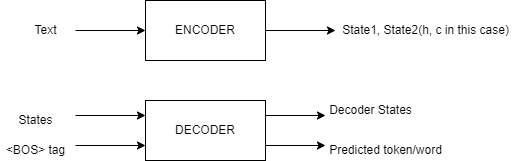

The whole architecture works as mentioned in the above flow diagram

Here we Model both encoder and decoder.(We use this encoder-decoder architecture)

Encoder model is generated using previously used encoder input placeholder and both the states of encoder_lstm

We generate decoder_state_input_h and decoder_state_input_c as input place holders for 400-vectors h and c(1st and second state), later we pass this as initial state of the decoder lstm, later decoder model is created with appropriate parameters

In [ ]:
encoder_model = Model([placeholder_enc], [state1, state2])

decoder_state_input_h = Input(shape=(400,))
decoder_state_input_c = Input(shape=(400,))

decoder_outputs, state_h, state_c = decoder_lstm(decoder_embed , 
                                                 initial_state=[decoder_state_input_h, decoder_state_input_c])

decoder_model = Model([placeholder_dec]+ [decoder_state_input_h, decoder_state_input_c],
                  [decoder_outputs]+ [state_h, state_c])


## Testing

In this function we used the encoder model which gives the intermediate states and these states are given as input to decoder model. The decoder model will now use the hidden states and the word predicted just before to generate the next word. The deocder model will also generate decoder states and these decoder states are passeed as input for predicting the next word.

Sequence_buffer holds texts temporarily which are used to predict the next word(initialised with '<BOS>')
    
Decoder outputs are sent to dense layer to predict the probability of the next occuring words these are stored in probabs and index of the wordwith highest occurence probability is stored in word_idx, we get the word corresponding to word_idx using inv_word_id(word2index mapping) dictionary we have previously declared.We store this wordin word sampled

As long as we donot find <EOS> in in word_sampled we keep on adding predicted words to the output string and reset sequence buffer and states
    
Once we find EOS we set flag to 1 and break from inner loop and print the output (predicted string reply)

    


We also converted the word id's into words using inverse word_id's dictionary created in the pre-processing stage.

In [ ]:
def chat_bot():
    print("<<<<<<<<<<<<<<<<<<<<<<    CONVERSATIONAL AI CHAT   >>>>>>>>>>>>>>>>>>>>>>>>")
    print()
    user_inp = ""
    
    while True:
        text = []
        user_inp  = input("Enter : ")
        user_inp = clean_text(user_inp)
        if(user_inp == 'goodbye' or user_inp == 'bye'):
            print()
            print("Conversational AI : Good bye, Nice talking to you!")
            break
        for x in [user_inp]:
            lst = []
            for y in x.split():
                try:
                    lst.append(word_id[y])
                except:
                    lst.append(word_id['<NULL>'])
            text.append(lst)
        sequence_buff = np.zeros( ( 1 , 1) )
        sequence_buff[0, 0] = word_id['<BOS>']
        text = pad_sequences(text, 15, padding='post')
        stat = encoder_model.predict(text)
        flag = 0
        output = ''

        while flag == 0 :
            dec_outputs , state_h, state_c= decoder_model.predict([sequence_buff] + stat )
            probabs = dense(dec_outputs)
            word_idx = np.argmax( probabs[0, -1, :] )
            word_sampled = inv_word_id[word_idx] + ' '

            if word_sampled != '<EOS> ':
                output += word_sampled  

            if word_sampled == '<EOS> ' or len(output.split()) > 15:
                flag = 1

            sequence_buff = np.zeros( ( 1 , 1 ) )  
            sequence_buff[ 0 , 0 ] = word_idx
            stat = [state_h, state_c]  

        print()    
        print("Conversational AI : ", output )
        print()
        print("<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>")  
        print()

In [ ]:
chat_bot()

<<<<<<<<<<<<<<<<<<<<<<    CONVERSATIONAL AI CHAT   >>>>>>>>>>>>>>>>>>>>>>>>

Enter : Hi

Conversational AI :  hi 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : HeY

Conversational AI :  hey 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : are you a robot

Conversational AI :  yes 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : you are a human

Conversational AI :  no i am not 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : shall we be friends

Conversational AI :  yes 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : where are you

Conversational AI :  i am everywhere 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : how are you

Conversational AI :  fine 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : do you play cricket

Conversational AI :  yes i am sure 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : goodbye

Conversational AI : Good bye, Nice talking to you!


In [ ]:
chat_bot()

<<<<<<<<<<<<<<<<<<<<<<    CONVERSATIONAL AI CHAT   >>>>>>>>>>>>>>>>>>>>>>>>

Enter : hi

Conversational AI :  hi 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : do you play chess

Conversational AI :  no i am not 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : are you a ghost

Conversational AI :  yes 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : do you watch cinema

Conversational AI :  yes 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : where do you live

Conversational AI :  i <NULL> know 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : tell me a joke

Conversational AI :  i <NULL> want to be a <NULL> 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : do you have any friends out there

Conversational AI :  you are the one who found this 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : are you stupid

Conversational AI :  yes 

<<<<<<<<>>>>>>><<<<<>>>>>>>><<<<<<<<>>>>>>>

Enter : do you live here

Conversational AI :  no i am not 

<<<<<<

## Syntactic Analysis

We know that Syntactic Processing includes ensuring that the prediction follow right syntax of grammer i.e. SUBJECT VERB PREDICATE

Here In our predictions although there are no explicit errors in the syntax, There are quite a few like

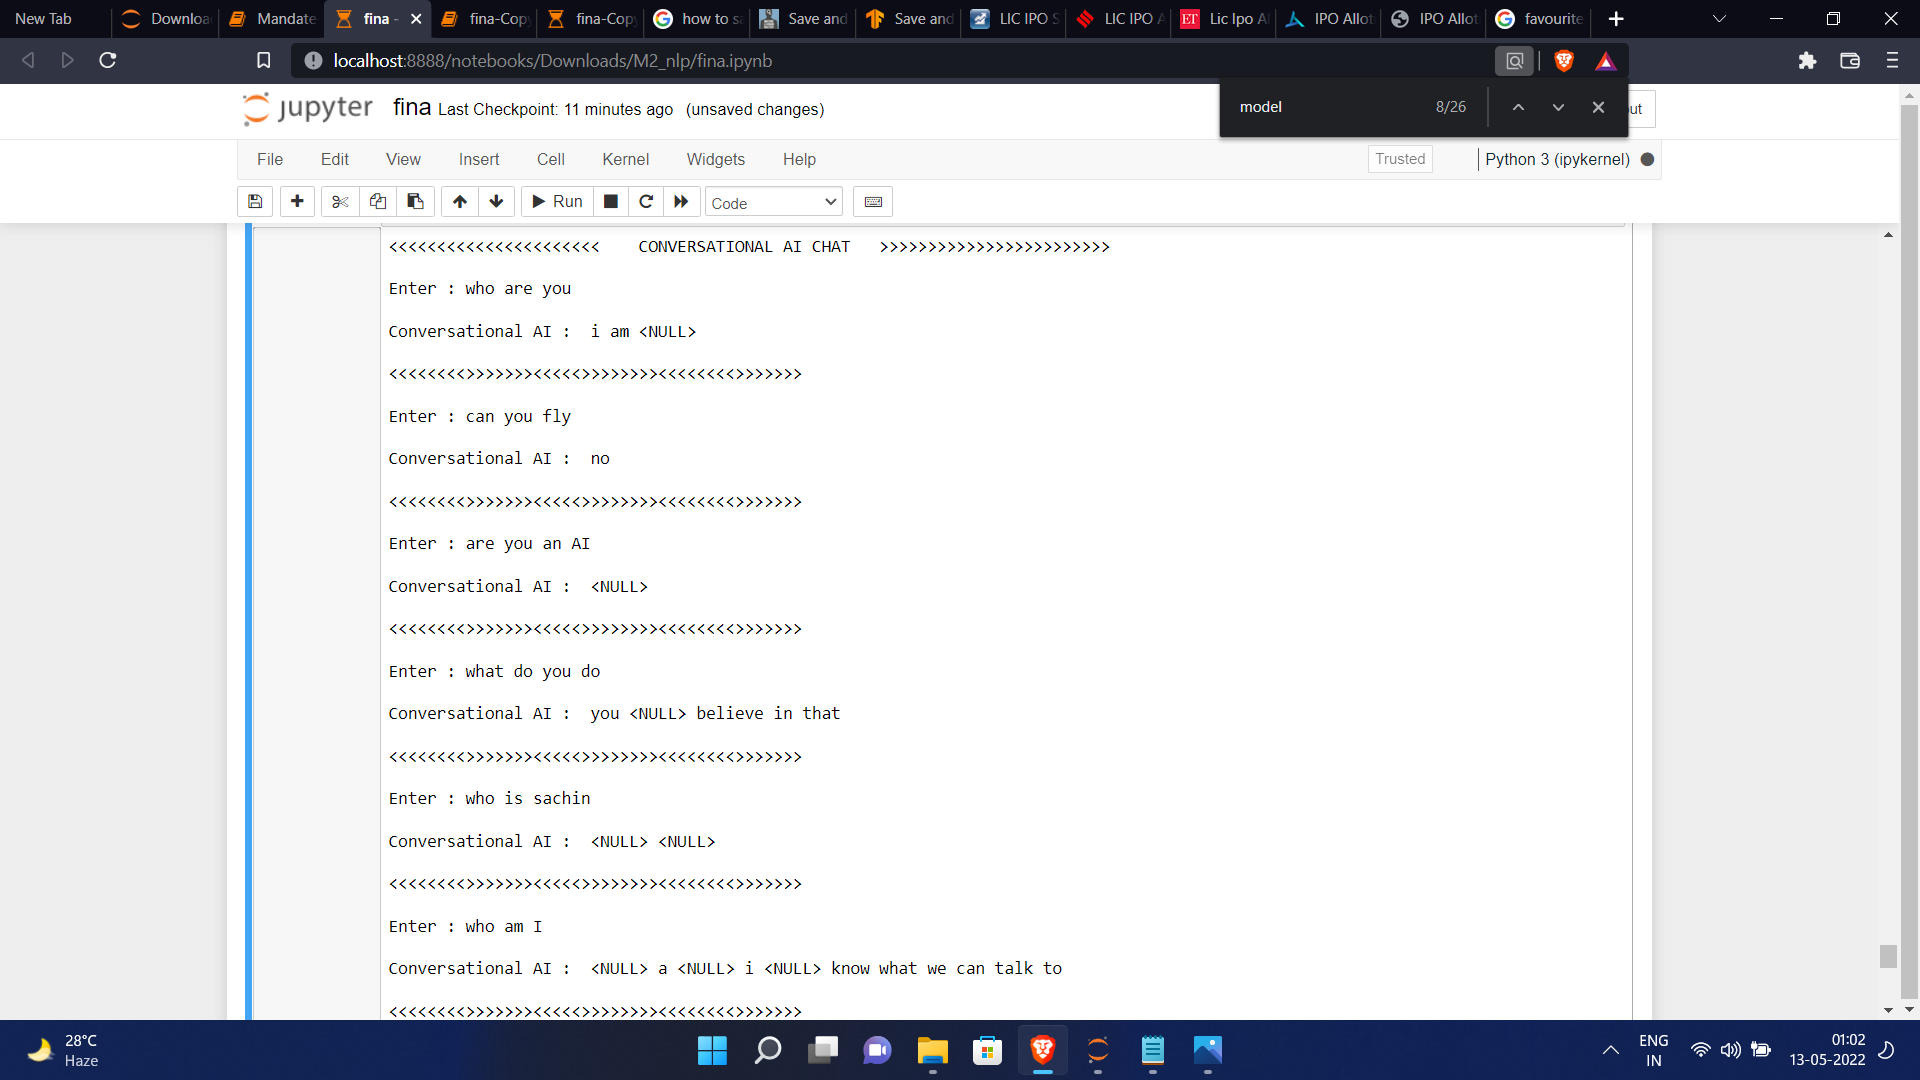

Where we have NULLs in the sentences so we donot know what to replace them with In case they are replaced with inappropriate words in the contexty of achieving propoer syntax , We may not have achieved proper syntax processign but the the other side of the coin is that NULLs can also be replaced with appropriate words corresponding to the syntax which can be sign of proper syntax analysis.

Since this is the only case wth NULLs and all the other predictions that doesnt include NULLs are with proper syntax like the ones below we may say that we have achieved proper syntax processing.


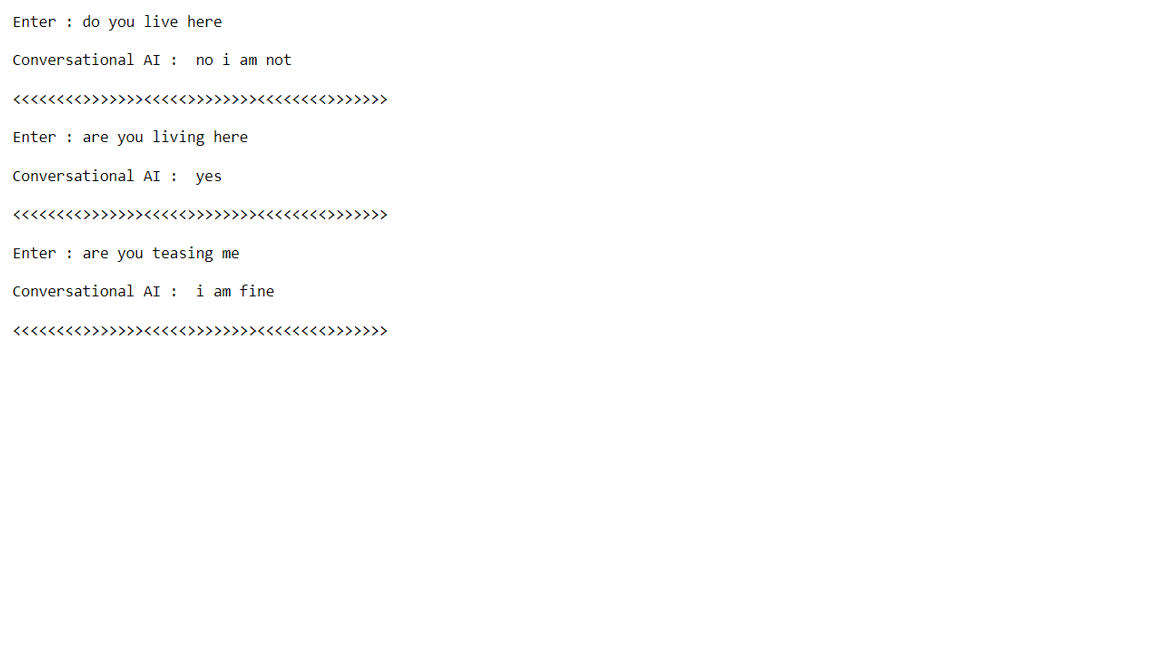

# Semantic Analysis

Semantic analysis refers to whether if predictions are semantically correct i.e. although they are syntactically right (Subject Verb Predicate) format they also need to be semantically meaningful

For example the following prediction is Syntactically correct and it sounds just right if you only watch the sentence, but is it related to the question that was posed?No right These are the cases where semantically correct predictions were not achieved
(Although in most of the cases we did achieve Semantically right predictions)

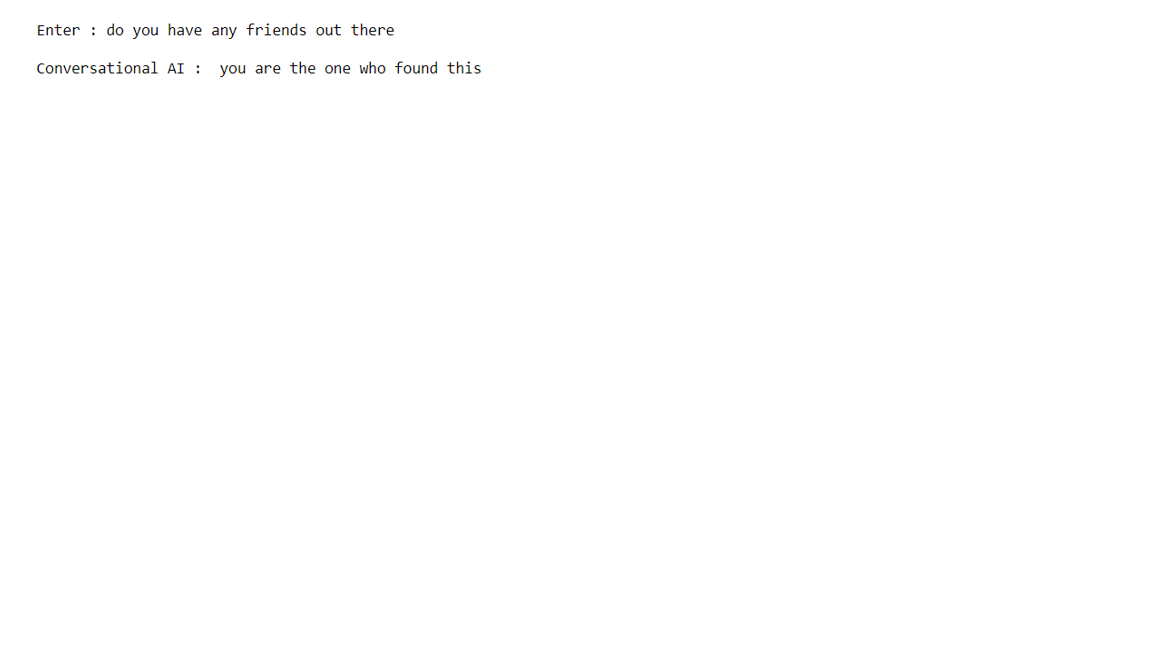

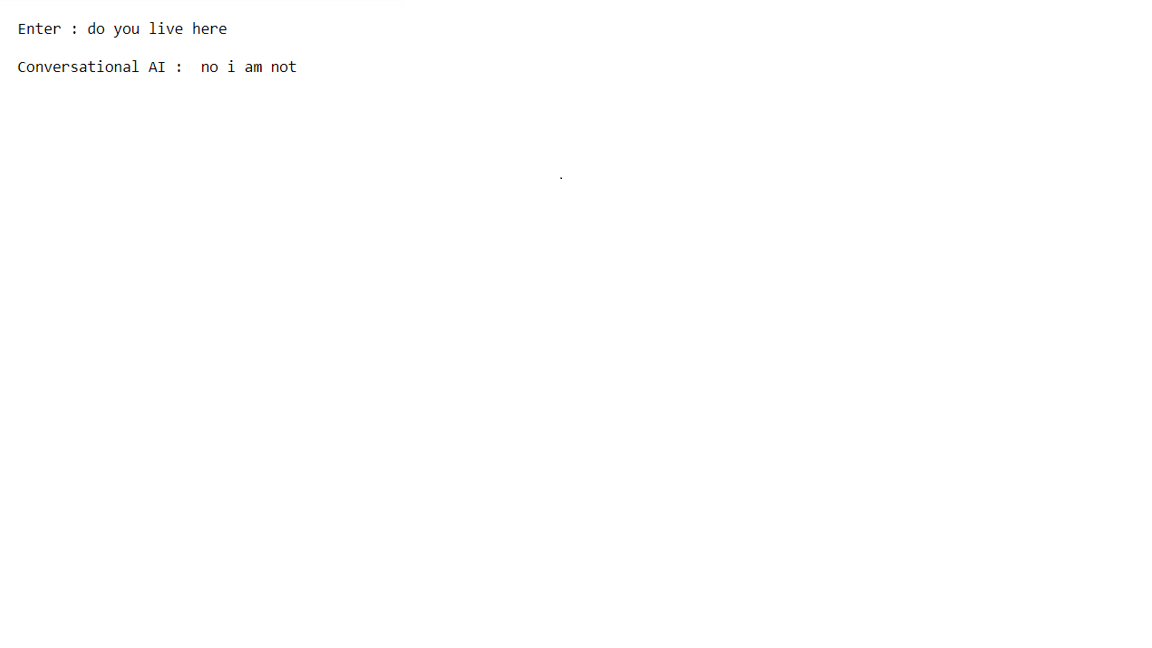

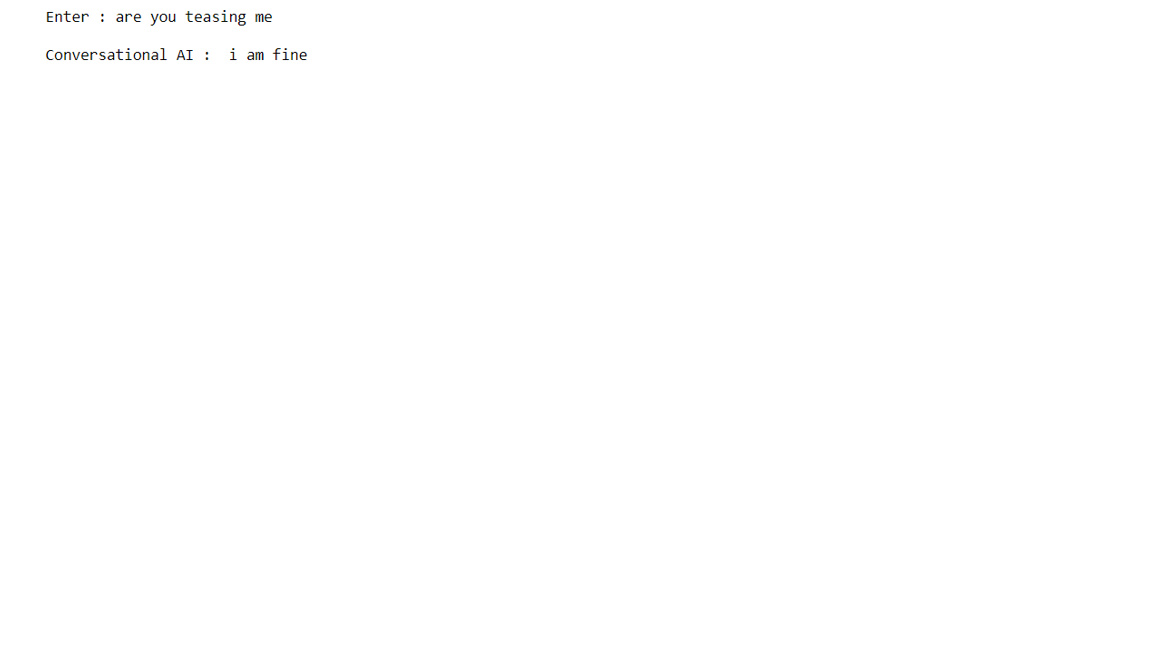

## References
1) https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/sequence/pad_sequences

2) https://www.tensorflow.org/api_docs/python/tf/keras/models

3) https://www.tensorflow.org/api_docs/python/tf/keras/layers

4) https://towardsdatascience.com/understanding-encoder-decoder-sequence-to-sequence-model-679e04af4346